<a href="https://www.kaggle.com/code/subhajeetdas/lung-cancer-prediction?scriptVersionId=127336127" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv


# Load Data

In [3]:
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# Data Cleaning & Visualization

In [4]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<AxesSubplot:>

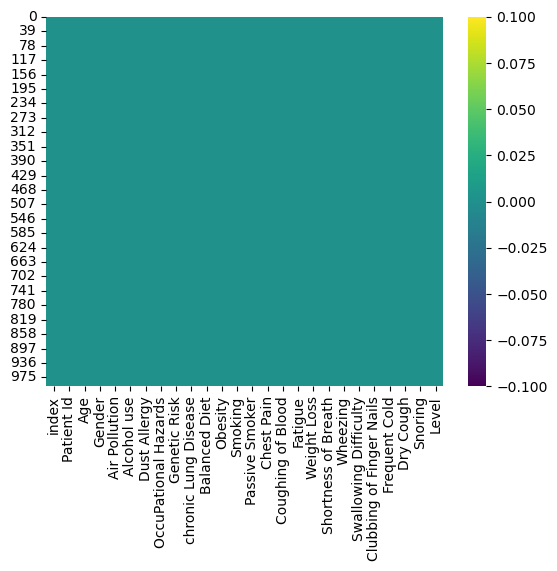

In [5]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [6]:
df.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
df.size

24000

In [8]:
df.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

<AxesSubplot:title={'center':'Dataset Details'}>

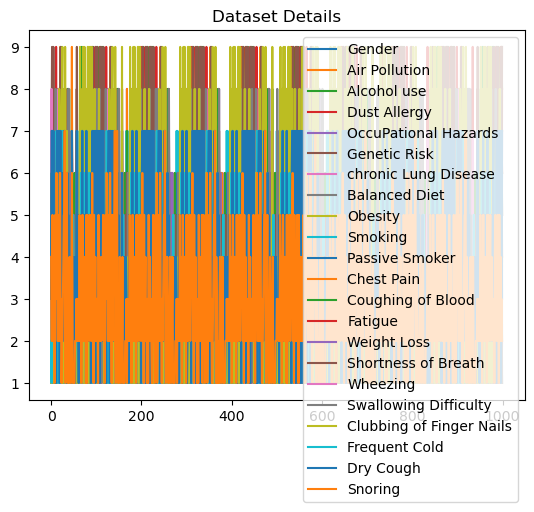

In [9]:
df.iloc[:, 1:24].plot(title="Dataset Details")

In [10]:
df_corr = df.corr()
df_corr

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


<AxesSubplot:title={'center':'Correlation Matrix'}>

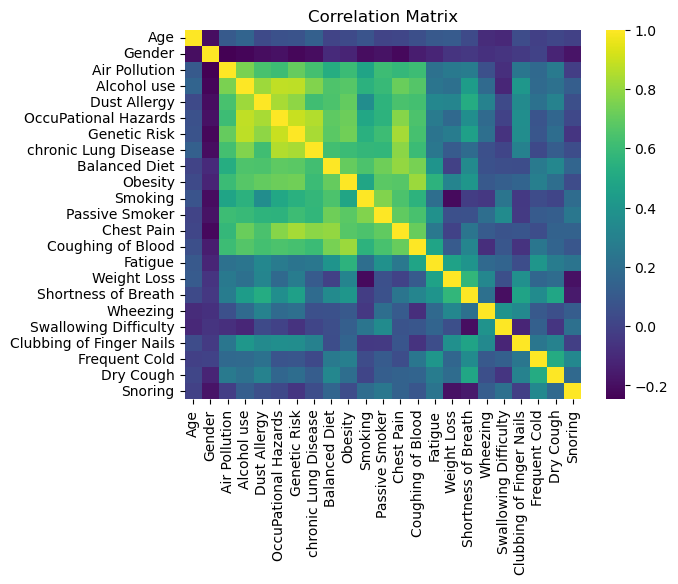

In [11]:
plt.title("Correlation Matrix")
sns.heatmap(df_corr, cmap='viridis')

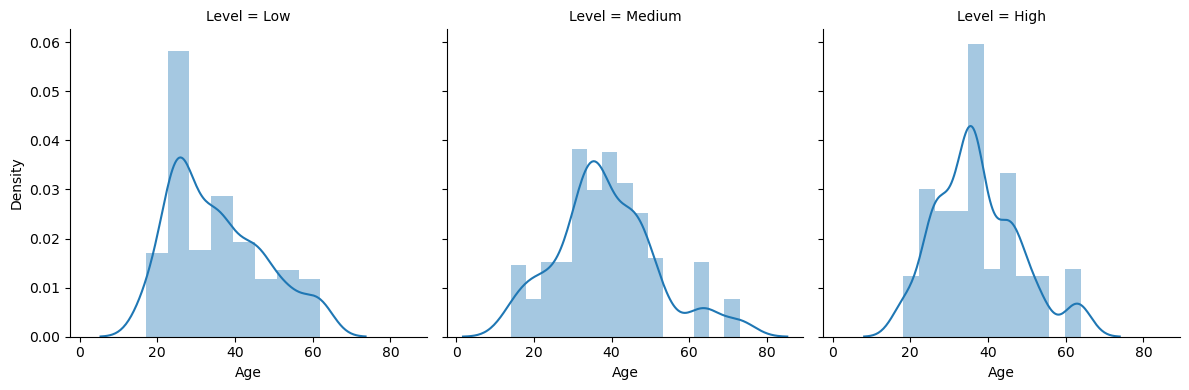

In [12]:
sea = sns.FacetGrid(df, col = "Level", height = 4)
sea.map(sns.distplot, "Age")

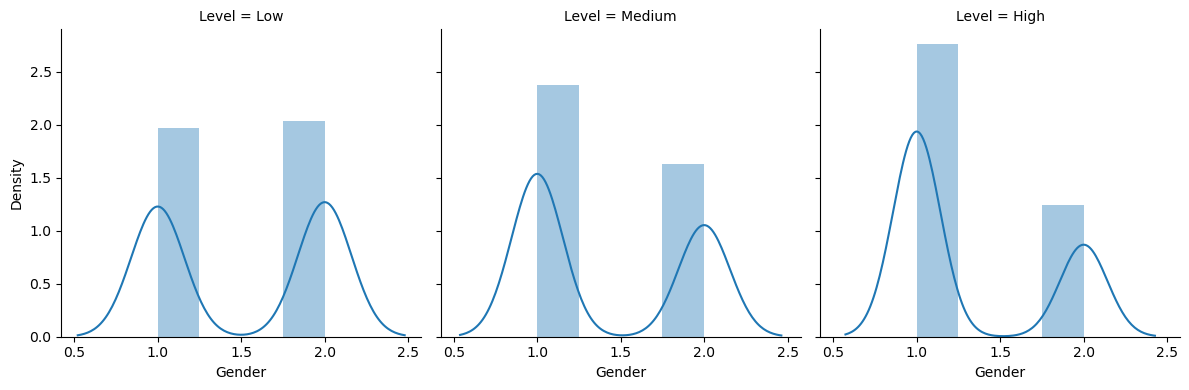

In [13]:
sea = sns.FacetGrid(df, col = "Level", height = 4)
sea.map(sns.distplot, "Gender")

In [14]:
x = df.iloc[:, 0:23]
x

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [15]:
x = x.values
x

array([[33,  1,  2, ...,  2,  3,  4],
       [17,  1,  3, ...,  1,  7,  2],
       [35,  1,  4, ...,  6,  7,  2],
       ...,
       [25,  2,  4, ...,  6,  7,  2],
       [18,  2,  6, ...,  4,  2,  3],
       [47,  1,  6, ...,  6,  7,  2]])

In [16]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [17]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [18]:
df['Level'].replace(to_replace = 'Low', value = 0, inplace = True)
df['Level'].replace(to_replace = 'Medium', value = 1, inplace = True)
df['Level'].replace(to_replace = 'High', value = 2, inplace = True)

df['Level'].value_counts()

2    365
1    332
0    303
Name: Level, dtype: int64

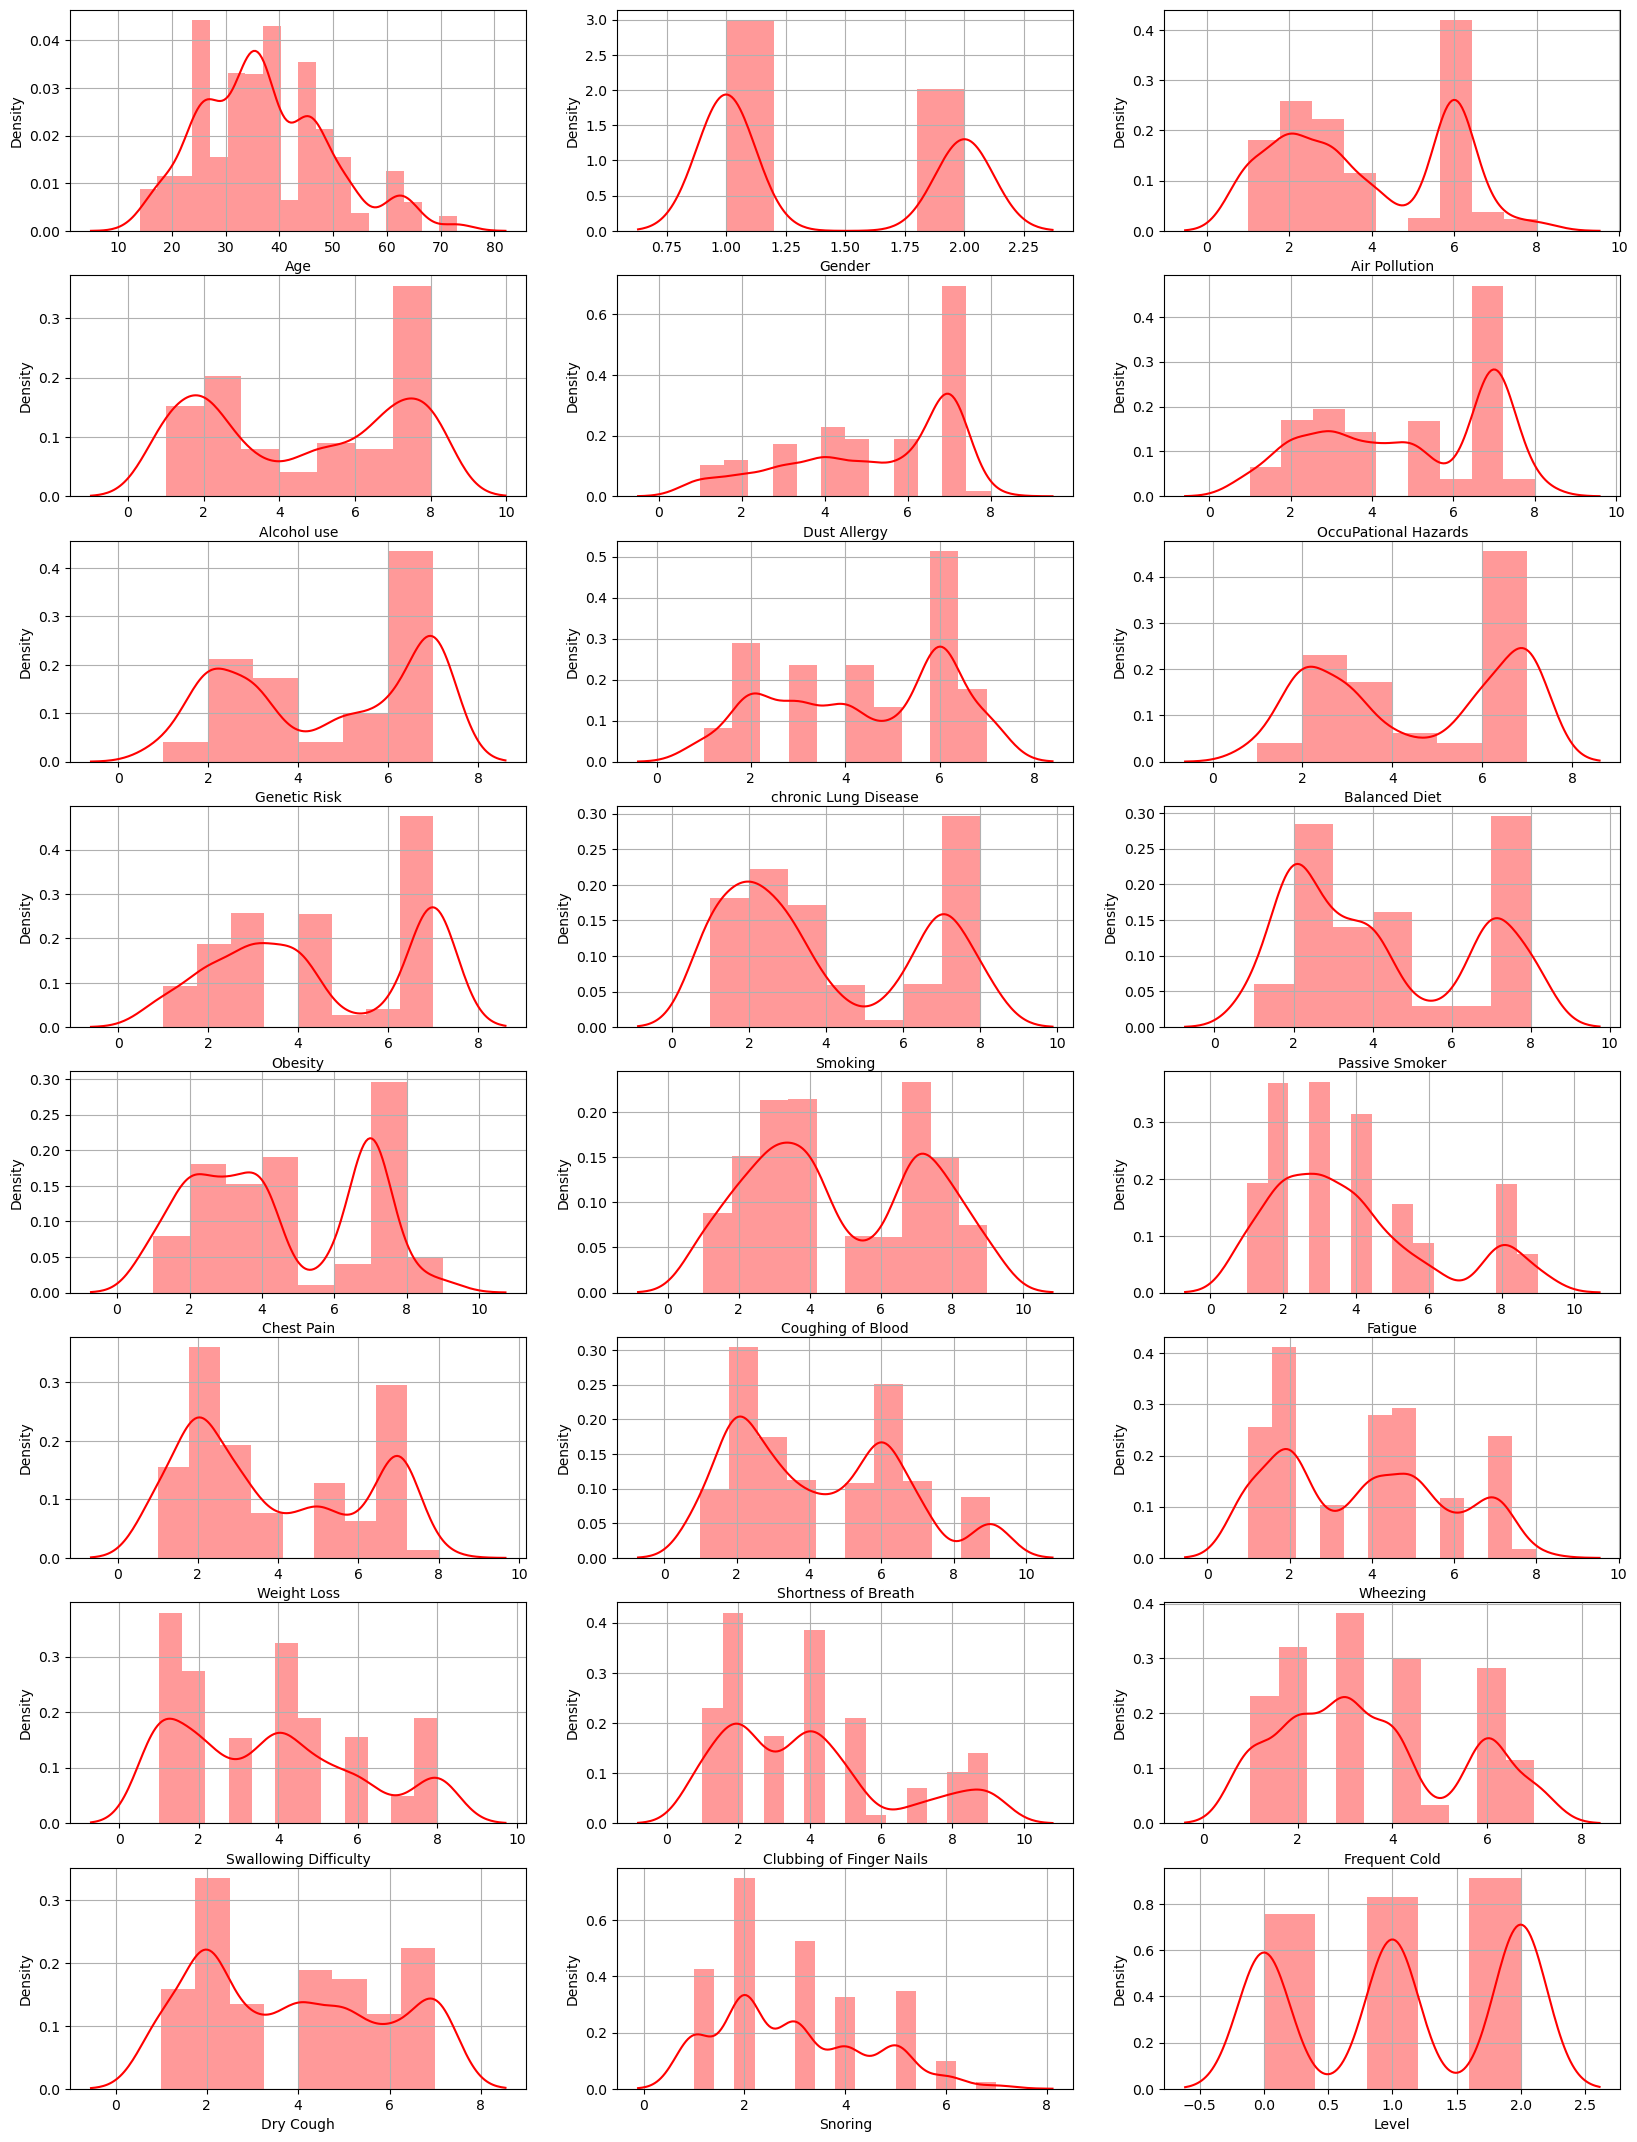

In [19]:
plt.figure(figsize = (20, 27))

for i in range(24):
    plt.subplot(8, 3, i+1)
    sns.distplot(df.iloc[:, i], color = 'red')
    plt.grid()

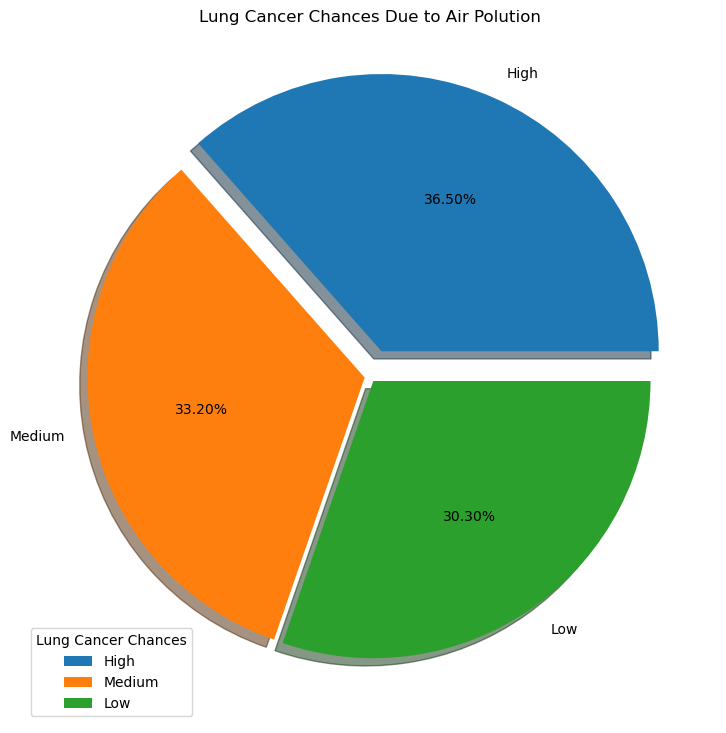

In [20]:
plt.figure(figsize = (11, 9))
plt.title("Lung Cancer Chances Due to Air Polution")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

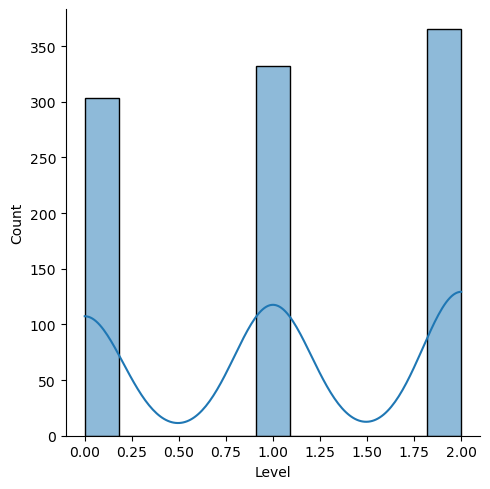

In [21]:
sns.displot(df['Level'], kde=True)

In [22]:
y = df.Level.values
y

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Train & Test Splitting the Data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Function of Measure Performance

In [24]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

# Random Forest

In [25]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_rf = model_rf.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



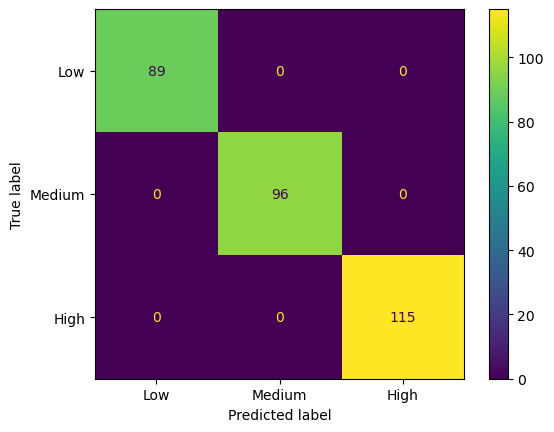

In [27]:
perform(y_pred_rf)

## Saving the Random Forest Model

In [28]:
filename = 'Lung_Cancer_RF.h5'
pickle.dump(model_rf, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


# ADABoost Classifier

In [29]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

AdaBoostClassifier()

In [30]:
y_pred_ada = model_ada.predict(x_test)

Precision :  0.7033333333333334
Recall :  0.7033333333333334
Accuracy :  0.7033333333333334
F1 Score :  0.7033333333333334

 [[  0  89   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.52      1.00      0.68        96
           2       1.00      1.00      1.00       115

    accuracy                           0.70       300
   macro avg       0.51      0.67      0.56       300
weighted avg       0.55      0.70      0.60       300

******************************************************



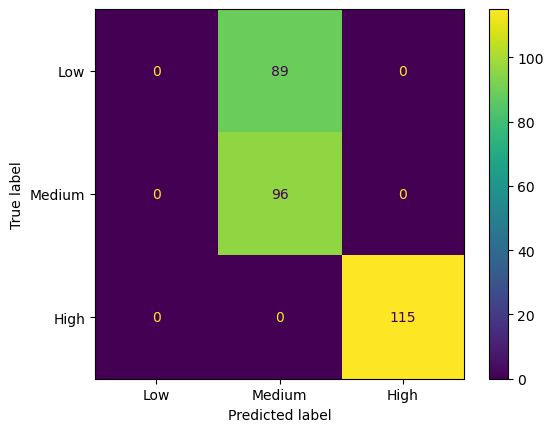

In [31]:
perform(y_pred_ada)

## Saving the ADABoost Classifier Model

In [32]:
filename = 'Lung_Cancer_ADA.h5'
pickle.dump(model_ada, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


# Extra Trees Classifier

In [33]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

ExtraTreesClassifier()

In [34]:
y_pred_etc = model_etc.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



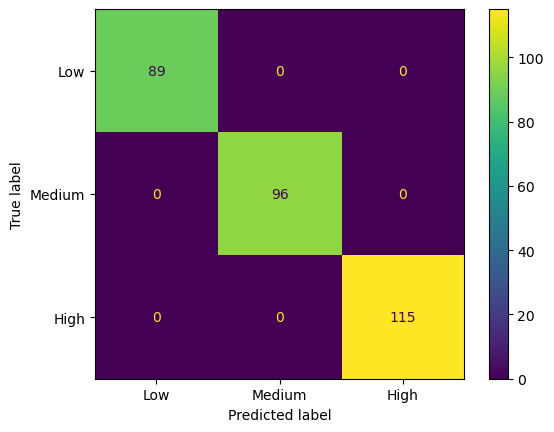

In [35]:
perform(y_pred_etc)

## Saving the Extra Trees Classifier Model

In [36]:
filename = 'Lung_Cancer_ETC.h5'
pickle.dump(model_etc, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


# Decision Tree

In [37]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred_dt = model_dt.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



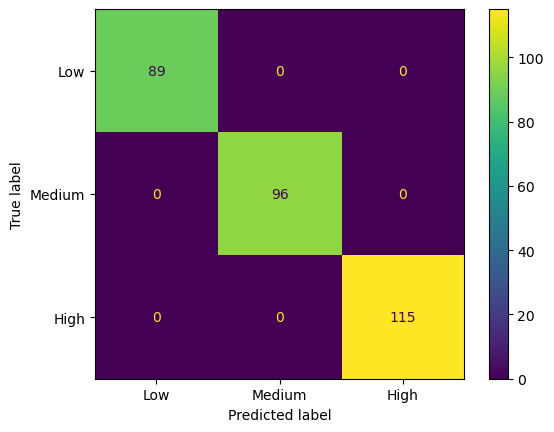

In [39]:
perform(y_pred_dt)

## Saving the Decision Tree Model

In [40]:
filename = 'Lung_Cancer_DT.h5'
pickle.dump(model_dt, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


## Decision Tree Visualization

In [41]:
feature_names = df.columns[0:23]
viz = df.copy()
viz["Level"]=viz["Level"].values.astype(str)
print(viz.dtypes)
target_names = viz['Level'].unique().tolist()

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


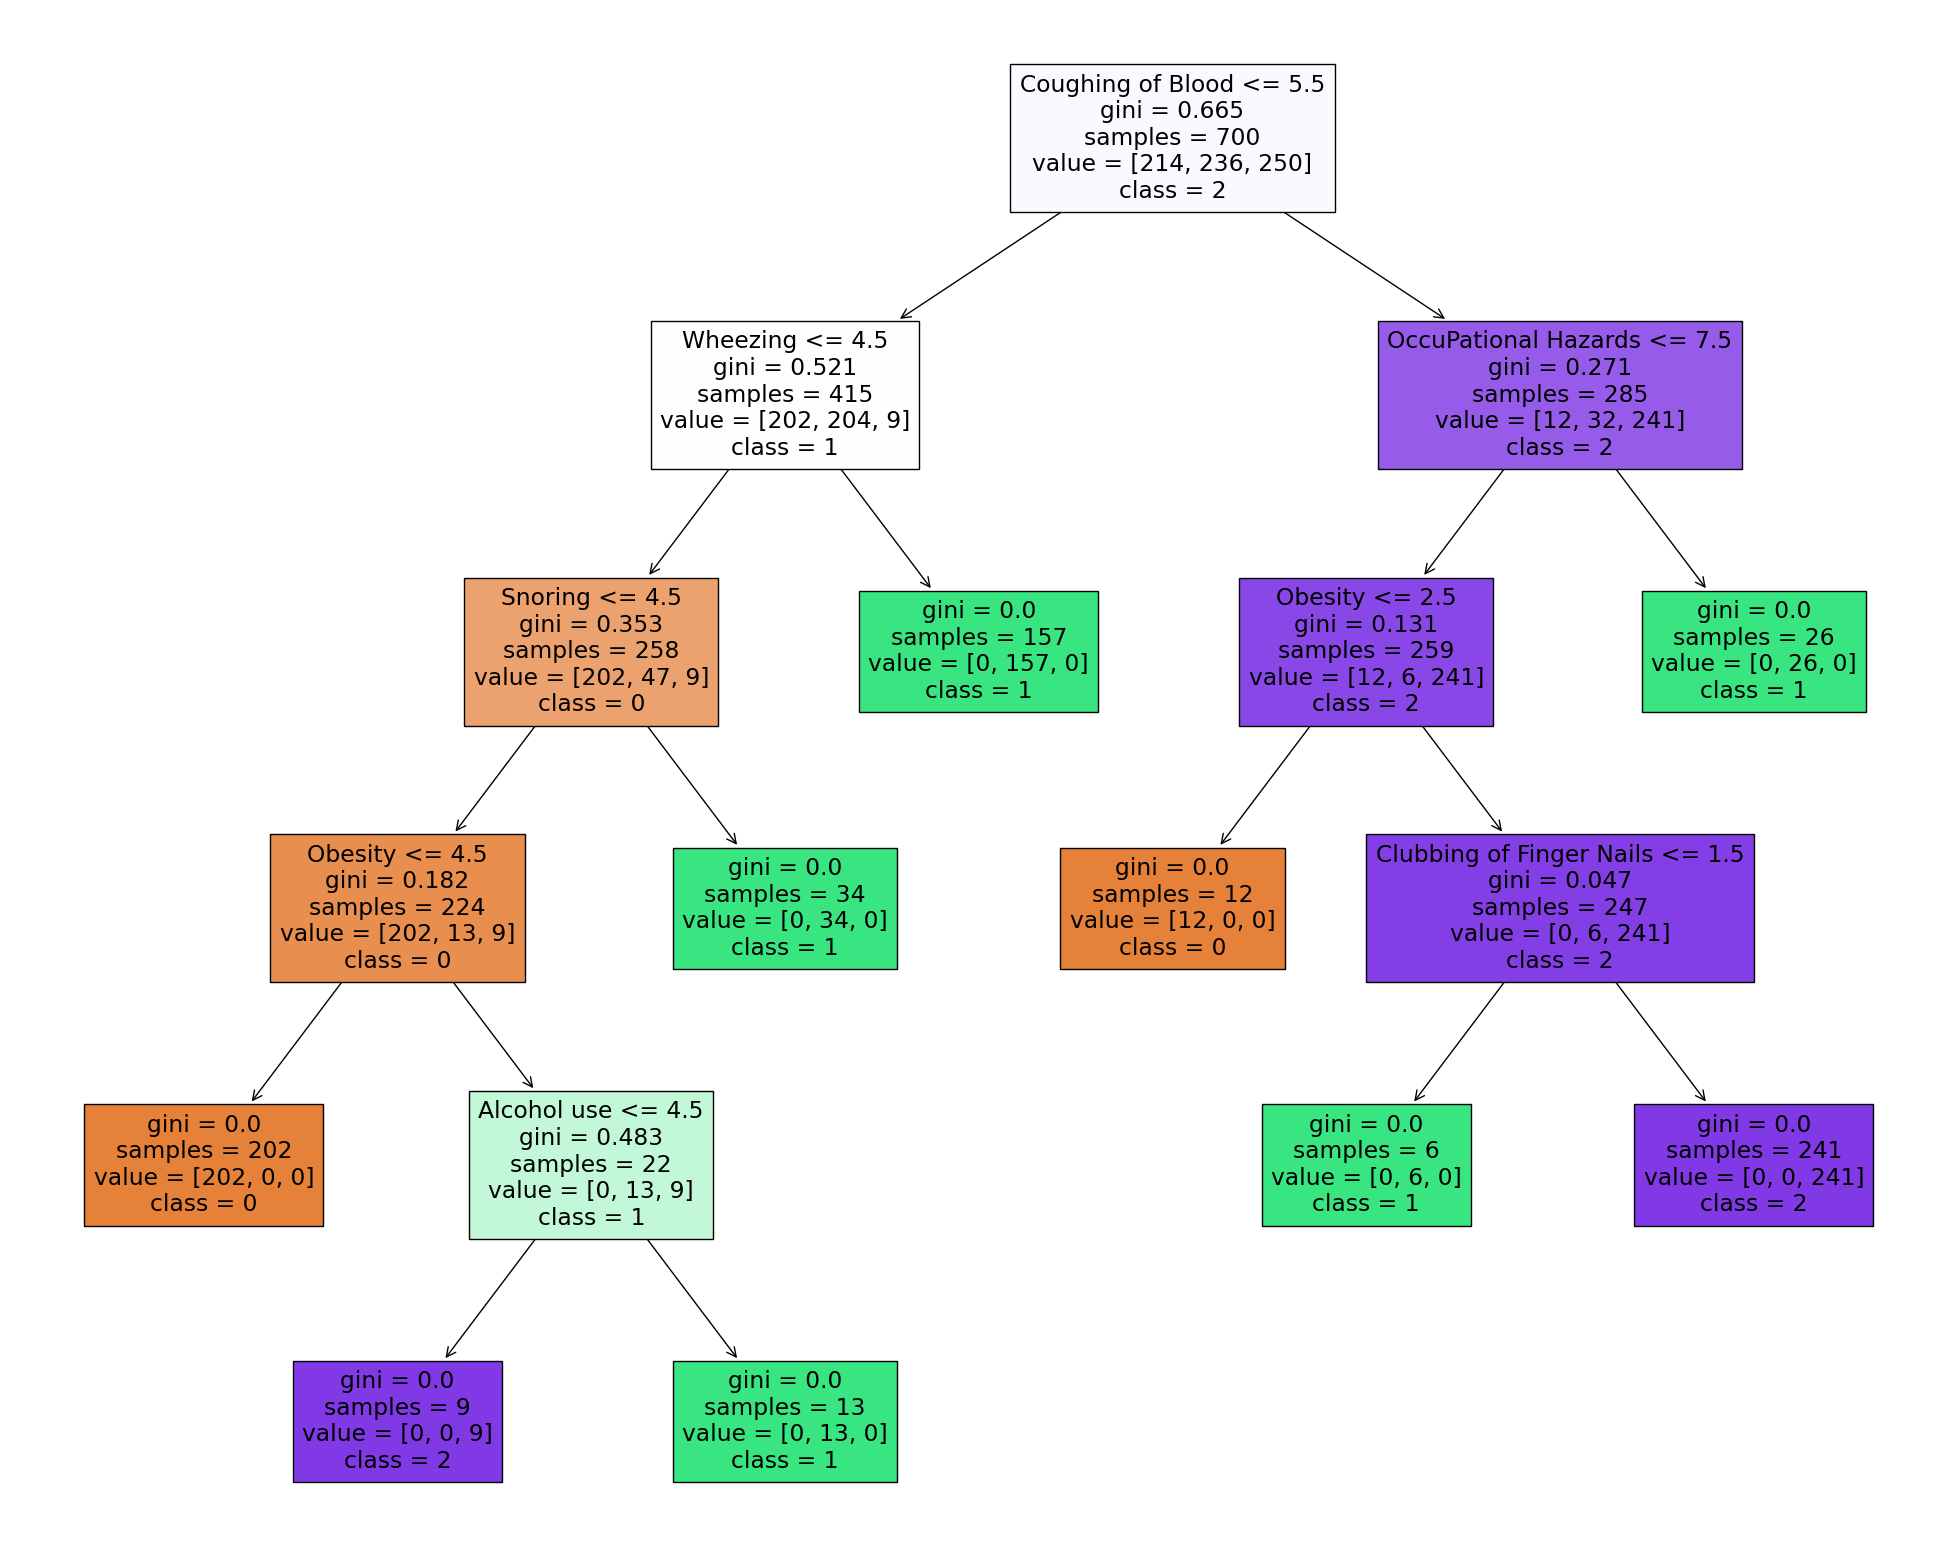

In [42]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

In [43]:
import dtreeviz

viz_model = dtreeviz.model(model_dt,
                           X_train=x_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Lung Cancer',
                           class_names=['Low', 'Medium', 'High'])

v = viz_model.view()     # render as SVG into internal object
v.save("Lung Cancer.svg")  # save as svg

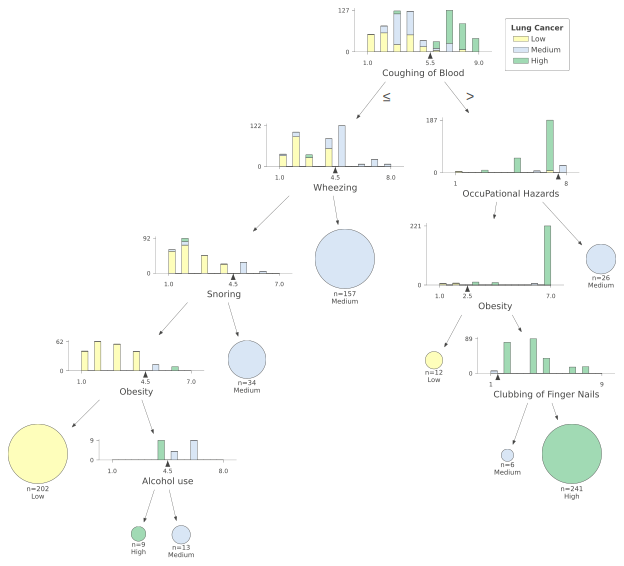

In [44]:
viz_model.view()

# Logistic Regression

In [45]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9866666666666667
Recall :  0.9866666666666667
Accuracy :  0.9866666666666667
F1 Score :  0.9866666666666668

 [[ 89   0   0]
 [  4  92   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        89
           1       1.00      0.96      0.98        96
           2       1.00      1.00      1.00       115

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

******************************************************



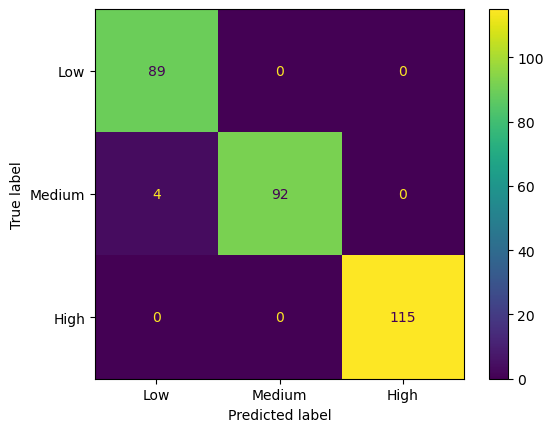

In [47]:
perform(y_pred_lr)

## Saving the Logistic Regression Model

In [48]:
filename = 'Lung_Cancer_LR.h5'
pickle.dump(model_lr, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


# XGBoost Classifier

In [49]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [50]:
y_pred_xgb = model_xgb.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



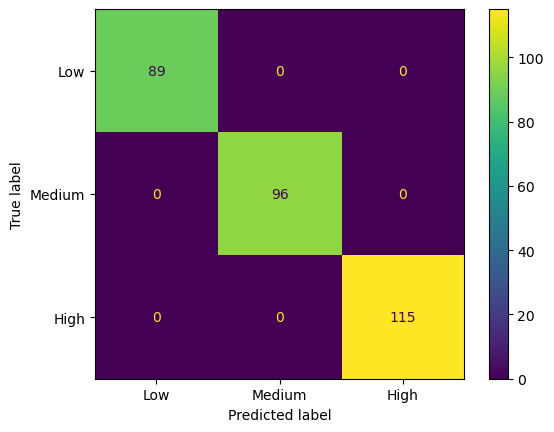

In [51]:
perform(y_pred_xgb)

## Saving the XGBoost Classifier Model

In [52]:
filename = 'Lung_Cancer_XGB.h5'
pickle.dump(model_xgb, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


# Multi-Layer Perceptron Classifier

In [53]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

MLPClassifier()

In [54]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.99
Recall :  0.99
Accuracy :  0.99
F1 Score :  0.99

 [[ 89   0   0]
 [  3  93   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.97      0.98        96
           2       1.00      1.00      1.00       115

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

******************************************************



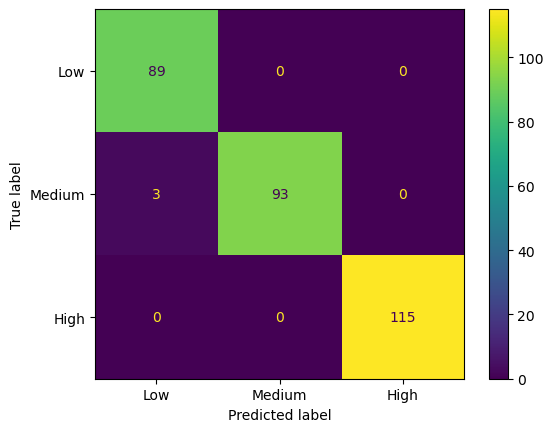

In [55]:
perform(y_pred_mlp)

## Saving the Multi-Layer Perceptron Classifier Model

In [56]:
filename = 'Lung_Cancer_MLP.h5'
pickle.dump(model_mlp, open(filename, 'wb'))
print("Model Saved.")

Model Saved.


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://i.pinimg.com/originals/40/12/1a/40121a3616ecf2439a5b04d733b6f437.gif" width="480" height="200"></p>